#Feature Selection- Filter Method:Mutual Information
https://github.com/solegalli/feature-selection-for-machine-learning/blob/main/05-Filter-Statistical-Tests/05.1-Mutual-information.ipynb[link text](https://)

# Import Packages

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile

# Import Data

In [38]:
dataset=pd.read_csv("/content/dataset_2.csv",nrows=50000)

In [ ]:
print(dataset.isnull().sum())

# Split the data into Test and Train set

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop(labels=['target'], axis=1),
    dataset['target'],
    test_size=0.3,
    random_state=0)

# Calculate Mutual Information

In [40]:
mi=mutual_info_classif(X_train,y_train)
#mi=mutual_info_regression(X_train,y_train)

Text(0, 0.5, 'Mutual Information')

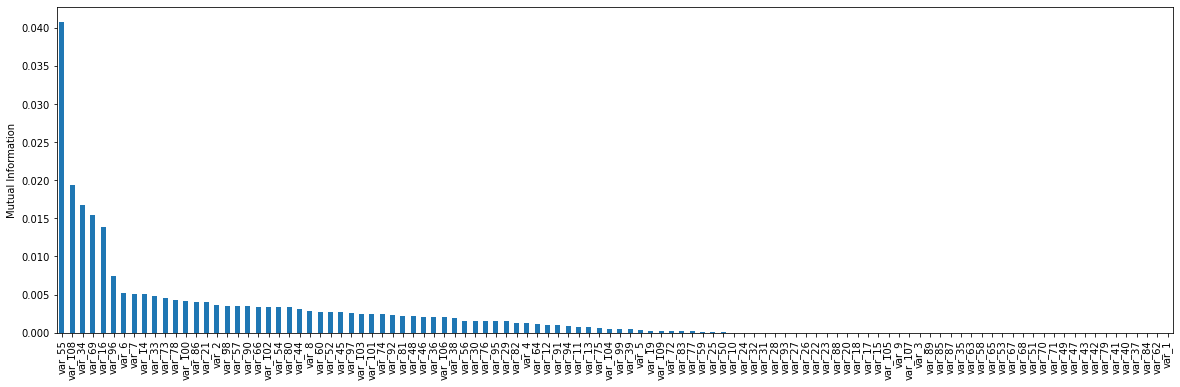

In [41]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

In [42]:
sel_ = SelectKBest(mutual_info_classif, k=10)
#sel_ = SelectKBest(mutual_info_regression, k=10)
sel_.fit(X_train, y_train)

SelectKBest(score_func=<function mutual_info_classif at 0x7f729bf469e0>)

In [43]:
#X_train=pd.DataFrame(X_train)
X_train.columns[sel_.get_support()]

Index(['var_6', 'var_7', 'var_16', 'var_34', 'var_48', 'var_55', 'var_69',
       'var_91', 'var_96', 'var_108'],
      dtype='object')

In [45]:
type(X_train)
X_train.shape,X_test.shape

((35000, 108), (15000, 108))

# Execute Transform to remove the less mutual info columns

In [46]:
X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

In [47]:
X_train.shape,X_test.shape

((35000, 10), (15000, 10))